In [1]:
os.getcwd()

'/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork'

In [1]:
from hedge_stand import HedgeST
from datetime import date, datetime
from demeter import TokenInfo, PoolBaseInfo, Runner, Strategy, Asset, AccountStatus, BuyAction, SellAction, RowData, \
    ChainType
import optunity
import optunity.metrics
from decimal import Decimal
import pandas as pd
import  matplotlib.pylab as plt
# import logging 
# from logging import handlers

from strategy_ploter import  plot_position_return_decomposition

%matplotlib inline

def backtest_instance(a, hedge_spread_split,hedge_spread_rate,alpha):
    # global RUNNING_TIME
    # print(f"==================spread running time {RUNNING_TIME}==================")

    decimal_a = Decimal(a).quantize(Decimal('0.00'))
    decimal_hedge_spread_split = Decimal(hedge_spread_split).quantize(Decimal('0.0'))
    decimal_hedge_spread_rate = Decimal(hedge_spread_rate).quantize(Decimal('0.00'))

    pool_id_tie500 = '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640'

    pool_id_tie3000 = '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8'

    eth = TokenInfo(name="eth", decimal=18)
    usdc = TokenInfo(name="usdc", decimal=6)
    pool = PoolBaseInfo(usdc, eth, 0.05, usdc)

    #收益计算基础参数
    # net_value_base = 'ETH'

    runner_instance = Runner(pool)
    # runner_instance.enable_notify = False
    runner_instance.strategy = HedgeST(decimal_a,decimal_hedge_spread_split,decimal_hedge_spread_rate,alpha)
    runner_instance.set_assets([Asset(usdc, 10000)])
    runner_instance.data_path = "../demeter/data"
    runner_instance.load_data(ChainType.Ethereum.name,
                                pool_id_tie500,
                                DATE_START,
                               DATE_END)
    runner_instance.run(enable_notify=False)

    hedge_count = runner_instance.strategy.hedge_count


    # df_status = pd.DataFrame(runner_instance.account_status_list)

    total_net_value = runner_instance.final_status.net_value
    
    final_total_usdc_value = round(total_net_value + runner_instance.strategy.e.df['total'].iloc[-1],3)
    
    final_price = runner_instance.final_status.price

    final_total_eth_value = round(final_total_usdc_value / final_price,3)

    notice = f"backtest spread:{RUNNING_TIME} times, a:{decimal_a}, hedge_spread_split:{decimal_hedge_spread_split}, hedge_spread_rate:{decimal_hedge_spread_rate},alpa:{alpha}"
    result =f"result: hedge count:{hedge_count} final_total_eth_value:{final_total_eth_value},final_total_usdc_value:{final_total_usdc_value}"
    print(notice)
    print(result)
    # if SEND_NOTICE:
    #     send_notice('CEX_Notify',notice)

    # RUNNING_TIME +=1

    # if NET_VALUE_BASE == 'USDC':
    #     print(final_total_usdc_value)
    #     return float(final_total_usdc_value)
    #     # profit_rate_usdc = profit_usdc / runner_instance.strategy.init_total_usdc
    # else:
    #     print(float(final_total_usdc_value / final_price))
    #     return float(final_total_usdc_value / final_price)


    return runner_instance


In [2]:
# constant_interval.py -- 3000

import demeter as dt
from demeter import PoolBaseInfo, Runner
from demeter._typing import TokenInfo, AccountStatus, Asset
from datetime import date
from demeter.download import ChainType

# from strategy_ploter1 import  plot_position_return_decomposition
ETH = TokenInfo(name="eth", decimal=18)
usdc = TokenInfo(name="usdc", decimal=6)
from IPython.display import (display, display_html, display_png, display_svg)
import  matplotlib.pyplot as plt
import numpy as np


In [3]:

class ConstantInterval(dt.Strategy):
    def __init__(self, a=100):
        super().__init__()
        self.a = a

    def initialize(self):
        P0 = self.broker.pool_status.price
        self.rebalance(P0)#rebalance all reserve token#
        # new_position(self, baseToken, quoteToken, usd_price_a, usd_price_b):
        #what is  base/quote "https://corporatefinanceinstitute.com/resources/knowledge/economics/currency-pair/"
        self.add_liquidity(P0 - self.a,
                           P0 + self.a)
        print("eth_value",self.broker.quote_asset.balance)
        super().__init__()


    def rebalance(self, price):
        status: AccountStatus = self.broker.get_account_status(price)
        base_amount = status.net_value / 2
        quote_amount_diff = base_amount / price - status.quote_balance
        if quote_amount_diff > 0:
            self.buy(quote_amount_diff)
        elif quote_amount_diff < 0:
            self.sell(0 - quote_amount_diff)


if __name__ == "__main__":
    eth = TokenInfo(name="eth", decimal=18)
    usdc = TokenInfo(name="usdc", decimal=6)
    pool = PoolBaseInfo(usdc, eth, 0.3, usdc)

    runner_instance = Runner(pool)
    runner_instance.enable_notify = False
    runner_instance.strategy = ConstantInterval(200)
    runner_instance.set_assets([Asset(usdc, 2000)])
    runner_instance.data_path = "/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork/demeter/data/eth3000"
    runner_instance.load_data(ChainType.Ethereum.name,
                              "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8",
                              date(2022, 10, 1),
                              date(2022, 10, 30))
    runner_instance.run(enable_notify=False)
    # print(runner_instance.final_status.net_value)

    # runner_instance.broker.get_account_status(runner_instance.final_status.uncollect_fee_base)
    # plot_position_return_decomposition(runner_instance.account_status_list)



2022-11-01 14:26:25,365 - INFO - start load files...
2022-11-01 14:26:25,505 - INFO - load file complete, preparing...
2022-11-01 14:26:27,161 - INFO - data has benn prepared
2022-11-01 14:26:27,163 - INFO - init strategy...
2022-11-01 14:26:27,166 - INFO - start main loop...


eth_value 0.1039468570104384459854512424


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 43196/43196 [00:02<00:00, 14484.49it/s]
2022-11-01 14:26:30,195 - INFO - main loop finished, start calculate evaluating indicator...
2022-11-01 14:26:30,230 - INFO - run evaluating indicator
2022-11-01 14:26:30,231 - INFO - back testing finish


In [4]:
df = pd.DataFrame(runner_instance.account_status_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43196 entries, 0 to 43195
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            43196 non-null  datetime64[ns]
 1   base_balance         43196 non-null  object        
 2   quote_balance        43196 non-null  object        
 3   uncollect_fee_base   43196 non-null  object        
 4   uncollect_fee_quote  43196 non-null  object        
 5   base_in_position     43196 non-null  object        
 6   quote_in_position    43196 non-null  object        
 7   net_value            43196 non-null  object        
 8   price                43196 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 3.0+ MB


In [5]:
df['diff_fee_base'] = df['uncollect_fee_base'].diff()
df['diff_fee_quote'] = df['uncollect_fee_quote'].diff()


In [6]:

df['fee_3000'] = df['diff_fee_base'] + df['diff_fee_quote'] * df['price']
# df.head()
df


,timestamp,base_balance,quote_balance,uncollect_fee_base,uncollect_fee_quote,base_in_position,quote_in_position,net_value,price,diff_fee_base,diff_fee_quote,fee_3000
0,2022-10-01 00:04:00,0usdc,0.10394686eth,0.00016154644usdc,0eth,997.00000usdc,0.65048683eth,1997.0002usdc,1325.4975usdc/eth,NaN,NaN,NaN
1,2022-10-01 00:05:00,0usdc,0.10394686eth,0.011173305usdc,0eth,998.90529usdc,0.64904963eth,1997.3109usdc,1325.8952usdc/eth,0.01101175865959906578736250752,0E-35,0.01101175865959906578736250752
2,2022-10-01 00:06:00,0usdc,0.10394686eth,0.019992527usdc,0eth,998.90529usdc,0.64904963eth,1997.3197usdc,1325.8952usdc/eth,0.00881922163470482845509977732,0E-35,0.008819221634704828455099777320
3,2022-10-01 00:07:00,0usdc,0.10394686eth,0.021451346usdc,0eth,1003.3521usdc,0.64569700eth,1998.0187usdc,1326.8236usdc/eth,0.00145881913938826657438833004,0E-35,0.001458819139388266574388330040
4,2022-10-01 00:08:00,0usdc,0.10394686eth,0.021451346usdc,0eth,1003.3521usdc,0.64569700eth,1998.0187usdc,1326.8236usdc/eth,0E-29,0E-35,0E-59
...,...,...,...,...,...,...,...,...,...,...,...,...
43191,2022-10-30 23:55:00,0usdc,0.10394686eth,29.732930usdc,0.020317191eth,1922.0108usdc,0eth,2149.1547usdc,1588.6409usdc/eth,0E-26,0E-29,0E-53
43192,2022-10-30 23:56:00,0usdc,0.10394686eth,29.732930usdc,0.020317191eth,1922.0108usdc,0eth,2149.1547usdc,1588.6409usdc/eth,0E-26,0E-29,0E-53
43193,2022-10-30 23:57:00,0usdc,0.10394686eth,29.732930usdc,0.020317191eth,1922.0108usdc,0eth,2149.1350usdc,1588.4820usdc/eth,0E-26,0E-29,0E-53
43194,2022-10-30 23:58:00,0usdc,0.10394686eth,29.732930usdc,0.020317191eth,1922.0108usdc,0eth,2149.1350usdc,1588.4820usdc/eth,0E-26,0E-29,0E-53


In [7]:
# constant_interval.py -- 500


class ConstantInterval(dt.Strategy):
    def __init__(self, a=100):
        super().__init__()
        self.a = a

    def initialize(self):
        P0 = self.broker.pool_status.price
        self.rebalance(P0)#rebalance all reserve token#
        # new_position(self, baseToken, quoteToken, usd_price_a, usd_price_b):
        #what is  base/quote "https://corporatefinanceinstitute.com/resources/knowledge/economics/currency-pair/"
        self.add_liquidity(P0 - self.a,
                           P0 + self.a)
        print("eth_value",self.broker.quote_asset.balance)
        super().__init__()


    def rebalance(self, price):
        status: AccountStatus = self.broker.get_account_status(price)
        base_amount = status.net_value / 2
        quote_amount_diff = base_amount / price - status.quote_balance
        if quote_amount_diff > 0:
            self.buy(quote_amount_diff)
        elif quote_amount_diff < 0:
            self.sell(0 - quote_amount_diff)


if __name__ == "__main__":
    eth = TokenInfo(name="eth", decimal=18)
    usdc = TokenInfo(name="usdc", decimal=6)
    pool = PoolBaseInfo(usdc, eth, 0.05, usdc)

    runner_instance = Runner(pool)
    runner_instance.enable_notify = False
    runner_instance.strategy = ConstantInterval(200)
    runner_instance.set_assets([Asset(usdc, 2000)])
    runner_instance.data_path = "/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork/demeter/data/eth500"
    runner_instance.load_data(ChainType.Ethereum.name,
                              "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640",
                              date(2022, 10, 1),
                              date(2022, 10, 30))
    runner_instance.run(enable_notify=False)
    # print(runner_instance.final_status.net_value)



2022-11-01 14:26:37,536 - INFO - start load files...
2022-11-01 14:26:37,686 - INFO - load file complete, preparing...
2022-11-01 14:26:39,163 - INFO - data has benn prepared
2022-11-01 14:26:39,164 - INFO - init strategy...
2022-11-01 14:26:39,164 - INFO - start main loop...


eth_value 0.1018824758210038526872592722


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 43200/43200 [00:02<00:00, 16226.64it/s]
2022-11-01 14:26:41,828 - INFO - main loop finished, start calculate evaluating indicator...
2022-11-01 14:26:41,990 - INFO - run evaluating indicator
2022-11-01 14:26:41,991 - INFO - back testing finish


In [8]:
df1 = pd.DataFrame(runner_instance.account_status_list)
df1

,timestamp,base_balance,quote_balance,uncollect_fee_base,uncollect_fee_quote,base_in_position,quote_in_position,net_value,price
0,2022-10-01 00:00:00,0usdc,0.10188248eth,0usdc,1.0505449e-9eth,999.50000usdc,0.65074283eth,1999.5000usdc,1328.6824usdc/eth
1,2022-10-01 00:01:00,0usdc,0.10188248eth,0usdc,1.0505449e-9eth,999.50000usdc,0.65074283eth,1999.5000usdc,1328.6824usdc/eth
2,2022-10-01 00:02:00,0usdc,0.10188248eth,0usdc,1.0505449e-9eth,999.50000usdc,0.65074283eth,1999.5000usdc,1328.6824usdc/eth
3,2022-10-01 00:03:00,0usdc,0.10188248eth,0usdc,1.0505449e-9eth,999.50000usdc,0.65074283eth,1999.5000usdc,1328.6824usdc/eth
4,2022-10-01 00:04:00,0usdc,0.10188248eth,0usdc,5.8402182e-8eth,998.86188usdc,0.65122312eth,1999.4001usdc,1328.5495usdc/eth
...,...,...,...,...,...,...,...,...,...
43195,2022-10-30 23:55:00,0usdc,0.10188248eth,33.326591usdc,0.024905427eth,1926.9592usdc,0eth,2162.0489usdc,1591.3437usdc/eth
43196,2022-10-30 23:56:00,0usdc,0.10188248eth,33.326591usdc,0.024905427eth,1926.9592usdc,0eth,2162.1498usdc,1592.1395usdc/eth
43197,2022-10-30 23:57:00,0usdc,0.10188248eth,33.326591usdc,0.024905427eth,1926.9592usdc,0eth,2162.1498usdc,1592.1395usdc/eth
43198,2022-10-30 23:58:00,0usdc,0.10188248eth,33.326591usdc,0.024905427eth,1926.9592usdc,0eth,2161.9481usdc,1590.5483usdc/eth


In [9]:
df1['diff_fee_base'] = df1['uncollect_fee_base'].diff()
df1['diff_fee_quote'] = df1['uncollect_fee_quote'].diff()
df1['fee_500'] = df1['diff_fee_base'] + df1['diff_fee_quote'] * df1['price']


In [10]:
# merge
df_all = df.merge(df1, on = 'timestamp', how = 'left')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43196 entries, 0 to 43195
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              43196 non-null  datetime64[ns]
 1   base_balance_x         43196 non-null  object        
 2   quote_balance_x        43196 non-null  object        
 3   uncollect_fee_base_x   43196 non-null  object        
 4   uncollect_fee_quote_x  43196 non-null  object        
 5   base_in_position_x     43196 non-null  object        
 6   quote_in_position_x    43196 non-null  object        
 7   net_value_x            43196 non-null  object        
 8   price_x                43196 non-null  object        
 9   diff_fee_base_x        43195 non-null  object        
 10  diff_fee_quote_x       43195 non-null  object        
 11  fee_3000               43195 non-null  object        
 12  base_balance_y         43196 non-null  object        
 13  q

In [11]:

df_all[['fee_3000','fee_500']].describe()

,fee_3000,fee_500
count,43195,43196
unique,7167,36881
top,0E-59,0E-56
freq,35958,6310


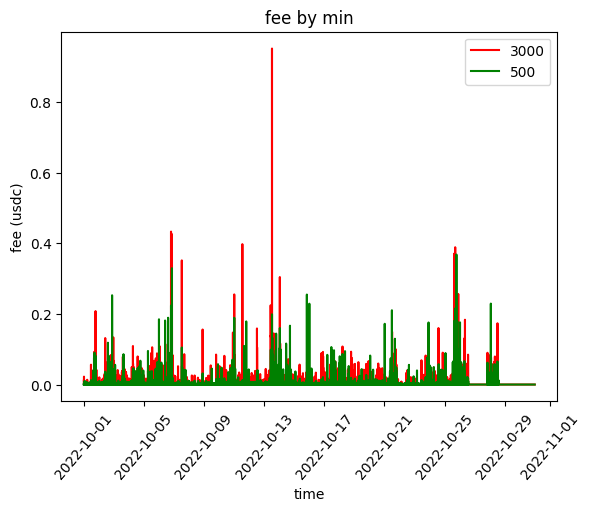

In [36]:
# 画图
%matplotlib inline

plt.figure()
fee_3000 = list(df_all['fee_3000'].apply(pd.to_numeric))
fee_500 = list(df_all['fee_500'].apply(pd.to_numeric))
timestamp = list(df_all['timestamp'])
plt.plot(timestamp, fee_3000, c='red', label="3000")
plt.plot(timestamp, fee_500, c='green', label="500")
plt.title('fee by min')
plt.legend()
plt.xlabel('time')
plt.ylabel('fee (usdc)')
plt.xticks(rotation=50)
plt.show()

In [ ]:
# APR

plt.figure()
fee_3000 = list(df_all['fee_3000'].apply(pd.to_numeric))
fee_500 = list(df_all['fee_500'].apply(pd.to_numeric))
timestamp = list(df_all['timestamp'])
plt.plot(timestamp, fee_3000, c='red', label="3000")
plt.plot(timestamp, fee_500, c='green', label="500")
plt.title('fee by min')
plt.legend()
plt.xlabel('time')
plt.ylabel('fee (usdc)')
plt.xticks(rotation=50)
plt.show()

In [33]:
# by day

df_all['Date'] = pd.to_datetime(df_all['timestamp'].dt.date)
df_all['fee_3000_day'] = df_all['fee_3000'].groupby(df_all['Date']).transform('sum')
df_all['fee_500_day'] = df_all['fee_500'].groupby(df_all['Date']).transform('sum')

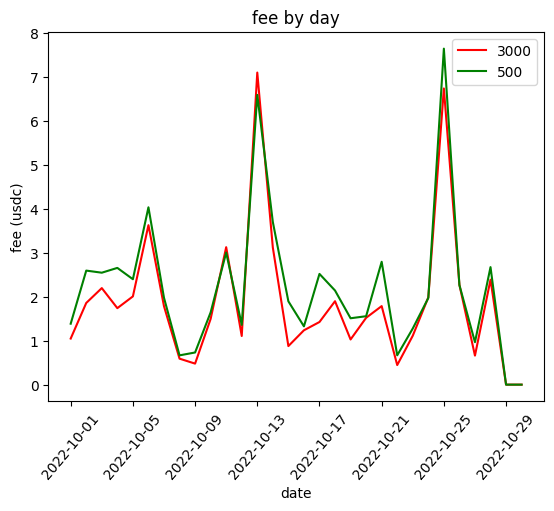

In [35]:
plt.figure()
fee_3000 = list(df_all['fee_3000_day'].apply(pd.to_numeric))
fee_500 = list(df_all['fee_500_day'].apply(pd.to_numeric))
date = list(df_all['Date'])
plt.plot(date, fee_3000, c='red', label="3000")
plt.plot(date, fee_500, c='green', label="500")
plt.legend()
plt.title('fee by day')
plt.xlabel('date')
plt.ylabel('fee (usdc)')
plt.xticks(rotation=50)
plt.show()

In [ ]:
# 100

class ConstantInterval(dt.Strategy):
    def __init__(self, a=100):
        super().__init__()
        self.a = a

    def initialize(self):
        P0 = self.broker.pool_status.price
        self.rebalance(P0)#rebalance all reserve token#
        # new_position(self, baseToken, quoteToken, usd_price_a, usd_price_b):
        #what is  base/quote "https://corporatefinanceinstitute.com/resources/knowledge/economics/currency-pair/"
        self.add_liquidity(P0 - self.a,
                           P0 + self.a)
        print("eth_value",self.broker.quote_asset.balance)
        super().__init__()


    def rebalance(self, price):
        status: AccountStatus = self.broker.get_account_status(price)
        base_amount = status.net_value / 2
        quote_amount_diff = base_amount / price - status.quote_balance
        if quote_amount_diff > 0:
            self.buy(quote_amount_diff)
        elif quote_amount_diff < 0:
            self.sell(0 - quote_amount_diff)


if __name__ == "__main__":
    eth = TokenInfo(name="eth", decimal=18)
    usdc = TokenInfo(name="usdc", decimal=6)
    pool = PoolBaseInfo(usdc, eth, 0.05, usdc)

    runner_instance = Runner(pool)
    runner_instance.enable_notify = False
    runner_instance.strategy = ConstantInterval(100)
    runner_instance.set_assets([Asset(usdc, 2000)])
    runner_instance.data_path = "/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork/demeter/data/eth500"
    runner_instance.load_data(ChainType.Ethereum.name,
                              "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640",
                              date(2022, 10, 1),
                              date(2022, 10, 30))
    runner_instance.run(enable_notify=False)
    # print(runner_instance.final_status.net_value)
